In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')

In [179]:
data=pd.read_csv(r'D:\Great Learning\All Data\Rohit Sharma Dataset\archive (5)\Rohit_Sharma_Centuries.csv')

In [180]:
data=pd.DataFrame(data)

In [4]:
data.head(3)

,S.No.,Date,Score,Strike Rate,Type of Match,Position,Innings,Dismissed,Man of the Match,Captain,Against,Venue,H/A/N,Result
0,1,28-05-2010,114,95.79,ODI,4,1,Yes,No,No,Zimbabwe,"Queens Sports Club, Bulawayo",Away,Lost
1,2,30-05-2010,101,170.00,ODI,4,2,No,Yes,No,Sri Lanka,"Queens Sports Club, Bulawayo",Neutral,Won
2,3,16-10-2013,141,114.63,ODI,1,2,No,Yes,No,Australia,"Sawai Mansingh Stadium, Jaipur",Home,Won


In [6]:
data.shape

(48, 14)

In [8]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
S.No.,48.0,24.500000,14.000000,1.00,12.7500,24.50,36.25,48.00
Score,48.0,134.937500,34.744298,100.00,111.0000,124.50,147.75,264.00
Strike Rate,48.0,109.656042,41.704401,50.56,85.1975,105.71,121.10,274.41
Position,48.0,1.708333,1.320192,1.00,1.0000,1.00,2.00,6.00
Innings,48.0,1.541667,0.581939,1.00,1.0000,1.50,2.00,3.00


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>

RangeIndex: 48 entries, 0 to 47

Data columns (total 14 columns):

 #   Column            Non-Null Count  Dtype  

---  ------            --------------  -----  

 0   S.No.             48 non-null     int64  

 1   Date              48 non-null     object 

 2   Score             48 non-null     int64  

 3   Strike Rate       48 non-null     float64

 4   Type of Match     48 non-null     object 

 5   Position          48 non-null     int64  

 6   Innings           48 non-null     int64  

 7   Dismissed         48 non-null     object 

 8   Man of the Match  48 non-null     object 

 9   Captain           48 non-null     object 

 10  Against           48 non-null     object 

 11  Venue             48 non-null     object 

 12  H/A/N             48 non-null     object 

 13  Result            48 non-null     object 

dtypes: float64(1), int64(4), object(9)

memory usage: 5.4+ KB


In [10]:
data.isnull().sum()

S.No.               0
Date                0
Score               0
Strike Rate         0
Type of Match       0
Position            0
Innings             0
Dismissed           0
Man of the Match    0
Captain             0
Against             0
Venue               0
H/A/N               0
Result              0
dtype: int64

In [15]:
(data.isnull().sum()/len(data))*100

S.No.               0.0
Date                0.0
Score               0.0
Strike Rate         0.0
Type of Match       0.0
Position            0.0
Innings             0.0
Dismissed           0.0
Man of the Match    0.0
Captain             0.0
Against             0.0
Venue               0.0
H/A/N               0.0
Result              0.0
dtype: float64

In [16]:
data.corr()

,S.No.,Score,Strike Rate,Position,Innings
S.No.,1.000000,-0.282634,0.018707,0.085186,0.120131
Score,-0.282634,1.000000,0.012868,-0.084363,-0.326609
Strike Rate,0.018707,0.012868,1.000000,-0.276095,-0.314499
Position,0.085186,-0.084363,-0.276095,1.000000,0.182320
Innings,0.120131,-0.326609,-0.314499,0.182320,1.000000


In [17]:
data.std()

S.No.          14.000000
Score          34.744298
Strike Rate    41.704401
Position        1.320192
Innings         0.581939
dtype: float64

In [18]:
data.skew()

S.No.          0.000000
Score          1.694423
Strike Rate    1.463573
Position       2.420579
Innings        0.507734
dtype: float64

In [19]:
data.kurt()

S.No.         -1.200000
Score          3.339554
Strike Rate    3.948777
Position       5.397656
Innings       -0.654433
dtype: float64

In [20]:
data.mean()

S.No.           24.500000
Score          134.937500
Strike Rate    109.656042
Position         1.708333
Innings          1.541667
dtype: float64

# Exploratory Data Analysis- Univariate, Bivariate and Multivariate Analysis

In [12]:
num_cols=data.select_dtypes(include='number')

In [14]:
num_cols.columns

Index(['S.No.', 'Score', 'Strike Rate', 'Position', 'Innings'], dtype='object')

In [21]:
cat_cols=data.select_dtypes(include='object')

In [22]:
cat_cols.columns

Index(['Date', 'Type of Match', 'Dismissed ', 'Man of the Match', 'Captain',
       'Against', 'Venue', 'H/A/N', 'Result'],
      dtype='object')

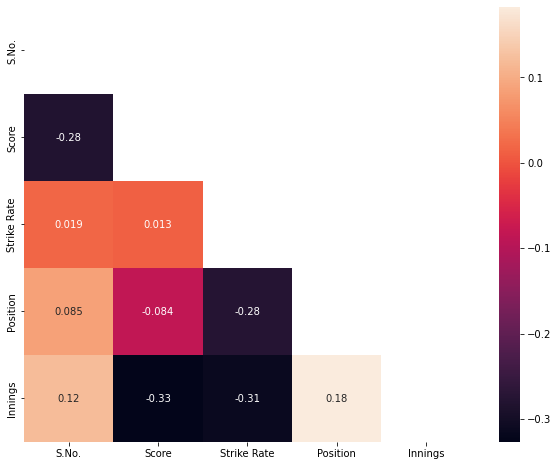

In [31]:
plt.figure(figsize=(10,8))
sns.heatmap(data.corr(), annot=True, mask=np.triu(np.ones_like(data.corr())))
plt.show()

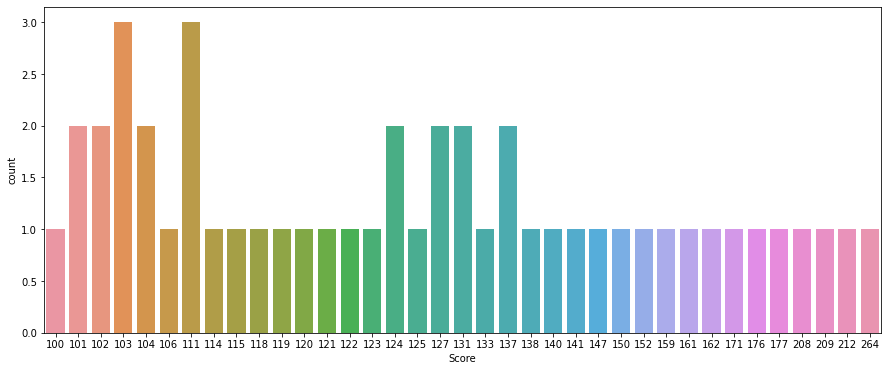

'Observation: We can observe that Rohit Sharma has most scored  103  and 111 runs.'

In [43]:
plt.figure(figsize=(15,6))
sns.countplot(data['Score'].sort_values(ascending=False))
plt.show()
display('Observation: We can observe that Rohit Sharma has most scored  103  and 111 runs.')

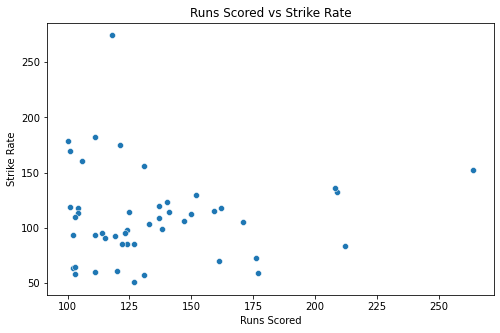

Observation: We can clearly observe that as runs increases strike also increases which shows the positive relation between them


In [48]:
plt.figure(figsize=(8,5))
sns.scatterplot(data['Score'],data['Strike Rate'])
plt.xlabel('Runs Scored')
plt.ylabel('Strike Rate')
plt.title('Runs Scored vs Strike Rate')
plt.show()
print('Observation: We can clearly observe that as runs increases strike also increases which shows the positive relation between them')

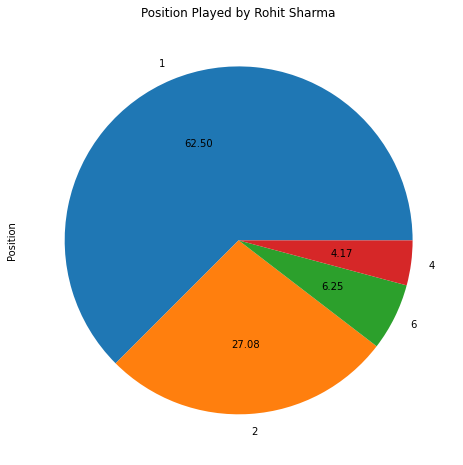

'Observation: 62% of the matches played as an opener, 27% of the matches played at 2nd position, 6% of the matches played at 6 position and only 4% of the matches played at 4th position'

In [75]:
plt.figure(figsize=(10,8))
data['Position'].value_counts().plot(kind='pie', autopct='%.2f')
plt.title('Position Played by Rohit Sharma')
plt.show()
display('Observation: 62% of the matches played as an opener, 27% of the matches played at 2nd position, 6% of the matches played at 6 position and only 4% of the matches played at 4th position')

In [82]:
position_score=data.groupby('Position')['Score'].sum()

In [81]:
print(position_score)

Position

1    4061

2    1811

4     215

6     390

Name: Score, dtype: int64


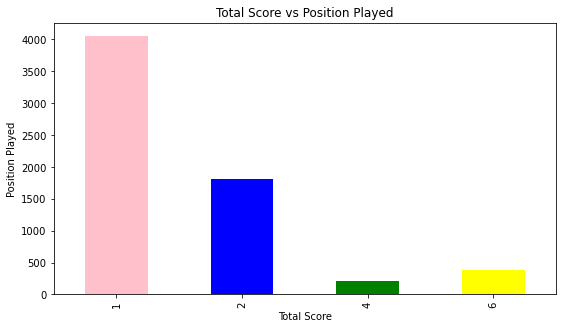

'Observation: More than four thousand runs scored by playing at 1st position, 1800 runs scored by playing at 2nd position, 390 runs scored by playing at 6th position and only 215 runs made at playing at 4th psotion  '

In [91]:
plt.figure(figsize=(9,5))
position_score.plot(kind='bar', color=['Pink','Blue','Green','Yellow'])
plt.ylabel('Position Played')
plt.xlabel('Total Score')
plt.title('Total Score vs Position Played')
plt.show()
display('Observation: More than four thousand runs scored by playing at 1st position, 1800 runs scored by playing at 2nd position, 390 runs scored by playing at 6th position and only 215 runs made at playing at 4th psotion  ')

In [95]:
max_position_score=data.groupby('Position')['Score'].max()

In [96]:
print(max_position_score)

Position

1    209

2    264

4    114

6    177

Name: Score, dtype: int64


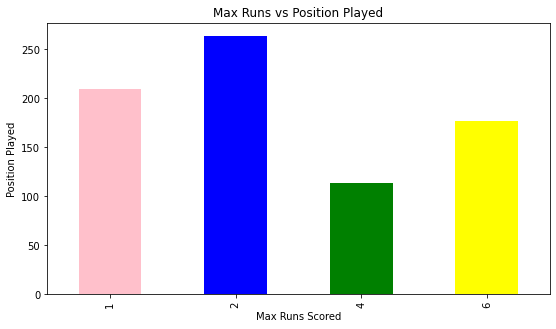

In [99]:
plt.figure(figsize=(9,5))
max_position_score.plot(kind='bar', color=['Pink','Blue','Green','Yellow'])
plt.xlabel('Max Runs Scored')
plt.ylabel('Position Played')
plt.title('Max Runs vs Position Played')
plt.show()
display('Observation: Playing at 2nd position he scored maximum score i.e. 264')

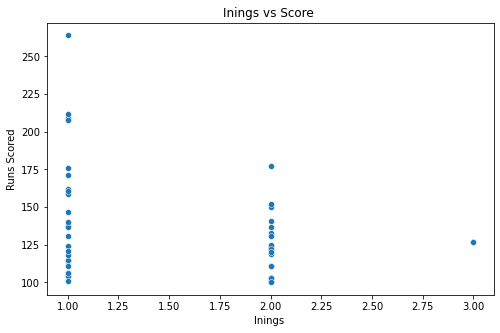

'Observation: Rohit Sharma has scored more runs in the first innings compared to the second innings'

In [110]:
plt.figure(figsize=(8,5))
sns.scatterplot(data['Innings'],data['Score'])
plt.xlabel('Inings ')
plt.ylabel('Runs Scored')
plt.title('Inings vs Score ')
plt.show()
display('Observation: Rohit Sharma has scored more runs in the first innings compared to the second innings')

In [101]:
num_cols.columns

Index(['S.No.', 'Score', 'Strike Rate', 'Position', 'Innings'], dtype='object')

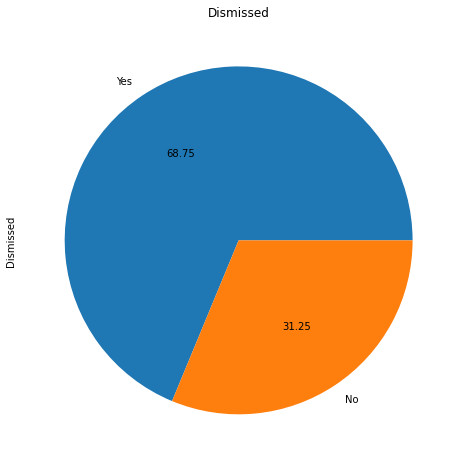

'Observation: Rohit Sharma has been out 68% of the time and not out 31% of the time.'

In [160]:
plt.figure(figsize=(10,8))
data['Dismissed '].value_counts().plot(kind='pie', autopct='%.2f')
plt.title('Dismissed')
plt.show()
display('Observation: Rohit Sharma has been out 68% of the time and not out 31% of the time.')

# Calculating Winning Percentage when he is the Captain

In [148]:
captain_data=data[data['Captain']=='Yes']

In [149]:
captain_data

,S.No.,Date,Score,Strike Rate,Type of Match,Position,Innings,Dismissed,Man of the Match,Captain,Against,Venue,H/A/N,Result
15,16,13-12-2017,208,135.94,ODI,1,1,No,Yes,Yes,Sri Lanka,"Punjab Cricket Association Stadium, Mohali",Home,Won
18,19,23-09-2018,111,93.27,ODI,1,2,No,No,Yes,Pakistan,"Dubai Cricket Stadium, Dubai",Neutral,Won
29,30,24-01-2023,101,118.82,ODI,1,1,Yes,No,Yes,New Zealand,"Holkar Cricket Stadium, Indore",Home,Won
30,31,11-10-2023,131,155.95,ODI,1,2,Yes,Yes,Yes,Afghanistan,"Arun Jaitley Stadium, Delhi",Home,Won
39,40,09-02-2023,120,60.85,Test,1,2,Yes,No,Yes,Australia,"Vidarbha Cricket Association Stadium, Nagpur",Home,Won
40,41,12-07-2023,103,58.05,Test,2,2,Yes,No,Yes,West Indies,"Windsor Park, Roseau",Away,Won
41,42,15-02-2024,131,57.05,Test,2,1,Yes,No,Yes,England,"Niranjan Shah Stadium, Rajkot",Home,Won
42,43,07-03-2024,103,64.37,Test,2,2,Yes,No,Yes,England,"HPCA Stadium, Dharamshala",Home,Won
44,45,22-12-2017,118,274.41,T20,1,1,Yes,Yes,Yes,Sri Lanka,"Holkar Cricket Stadium, Indore",Home,Won
46,47,06-11-2018,111,181.96,T20,1,1,No,Yes,Yes,West Indies,"Ekana Stadium, Lucknow",Home,Won


In [151]:
wins_as_captain = captain_data[captain_data['Result'] == 'Won'].shape[0]

In [153]:
total_matches_as_captain=captain.shape[0]

In [156]:
win_perc=(wins_as_captain/total_matches_as_captain)*100

In [159]:
print('Percentage of wins when Rohit Sharma was the captain:', win_perc)

Percentage of wins when Rohit Sharma was the captain: 100.0


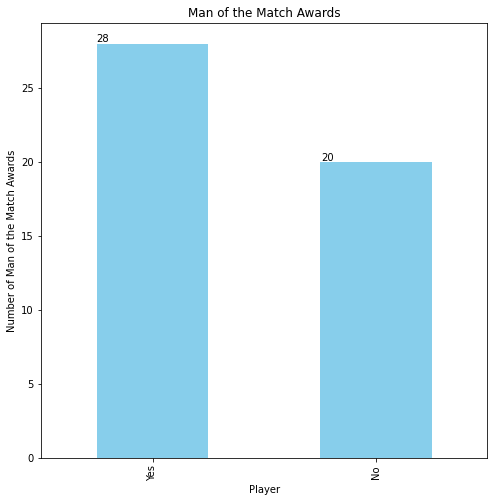

'Observation: 28 times he has been nominated with Man of the Match award and 20 times he havent received any Man of the Match award'

In [191]:
plt.figure(figsize=(8,8))
ax=data['Man of the Match'].value_counts().plot(kind='bar',color='skyblue')

for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))

plt.xlabel('Player')
plt.ylabel('Number of Man of the Match Awards')
plt.title('Man of the Match Awards')
plt.show()

display('Observation: 28 times he has been nominated with Man of the Match award and 20 times he havent received any Man of the Match award')

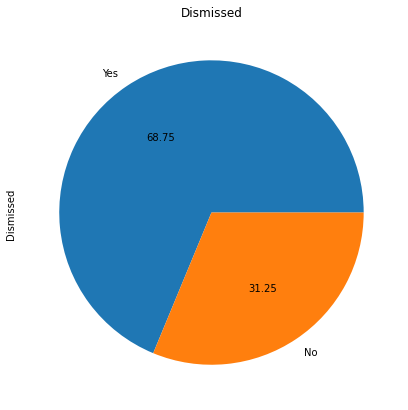

'bservation: He has been out 68% of the time and not out 31% of the time.'

In [205]:
plt.figure(figsize=(10,7))
data['Dismissed '].value_counts().plot(kind='pie', autopct='%.2f')
plt.title('Dismissed')
plt.show()
display('bservation: He has been out 68% of the time and not out 31% of the time.')

In [207]:
data.head(2)

,S.No.,Date,Score,Strike Rate,Type of Match,Position,Innings,Dismissed,Man of the Match,Captain,Against,Venue,H/A/N,Result
0,1,28-05-2010,114,95.79,ODI,4,1,Yes,No,No,Zimbabwe,"Queens Sports Club, Bulawayo",Away,Lost
1,2,30-05-2010,101,170.00,ODI,4,2,No,Yes,No,Sri Lanka,"Queens Sports Club, Bulawayo",Neutral,Won


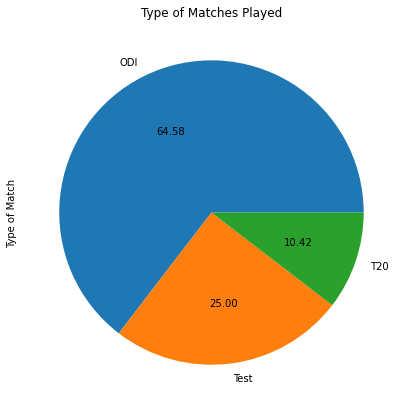

In [212]:
plt.figure(figsize=(10,7))
data['Type of Match'].value_counts().plot(kind='pie', autopct='%.2f')
plt.title('Type of Matches Played')
plt.show()

# Feature Engineering

In [213]:
#we will convert few categorical columns into numerical values

In [214]:
from sklearn.preprocessing import LabelEncoder

In [375]:
label_encoded=LabelEncoder()

data['Dismissed_encode']=label_encoded.fit_transform(data['Dismissed '])
data['Man_of_the_Match_Encoded']=label_encoded.fit_transform(data['Man of the Match'])
data['Captain_encoded']=label_encoded.fit_transform(data['Captain'])
data['Result_encoded']=label_encoded.fit_transform(data['Result'])
data['H/A/N_encoded']=label_encoded.fit_transform(data['H/A/N'])
data['Type_of_match_encoded']=label_encoded.fit_transform(data['Type of Match'])


In [227]:
data.head(5)

,S.No.,Date,Score,Strike Rate,Type of Match,Position,Innings,Dismissed,Man of the Match,Captain,Against,Venue,H/A/N,Result,Dismissed_encode,Man_of_the_Match_Encoded,Captain_encoded,Result_encoded,H/A/N_encoded
0,1,28-05-2010,114,95.79,ODI,4,1,Yes,No,No,Zimbabwe,"Queens Sports Club, Bulawayo",Away,Lost,1,0,0,0,0
1,2,30-05-2010,101,170.00,ODI,4,2,No,Yes,No,Sri Lanka,"Queens Sports Club, Bulawayo",Neutral,Won,0,1,0,1,2
2,3,16-10-2013,141,114.63,ODI,1,2,No,Yes,No,Australia,"Sawai Mansingh Stadium, Jaipur",Home,Won,0,1,0,1,1
3,4,02-11-2013,209,132.27,ODI,1,1,Yes,Yes,No,Australia,"M. Chinnaswamy Stadium, Bangalore",Home,Won,1,1,0,1,1
4,5,13-11-2014,264,152.60,ODI,2,1,Yes,Yes,No,Sri Lanka,"Eden Gardens, Kolkata",Home,Won,1,1,0,1,1


In [233]:
data['Date']=pd.to_datetime(data['Date'])

In [234]:
data['Year']=data['Date'].dt.year

In [249]:
data[data['Dismissed_encode']==1]['Year'].value_counts()

2019    9
2015    4
2017    4
2023    4
2013    2
2018    2
2021    2
2024    2
2010    1
2014    1
2016    1
2020    1
Name: Year, dtype: int64

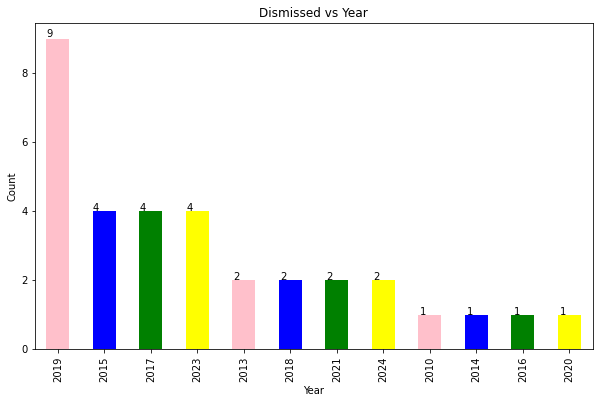

'Observation: Maximum no. of times he has been dismissed in the year 2019'

In [285]:
plt.figure(figsize=(10,6))
ax=data[data['Dismissed_encode']==1]['Year'].value_counts().plot(kind='bar',color=['Pink','Blue','Green','Yellow'])
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))

plt.title('Dismissed vs Year')
plt.ylabel('Count')
plt.xlabel('Year')
plt.show()
display('Observation: Maximum no. of times he has been dismissed in the year 2019')

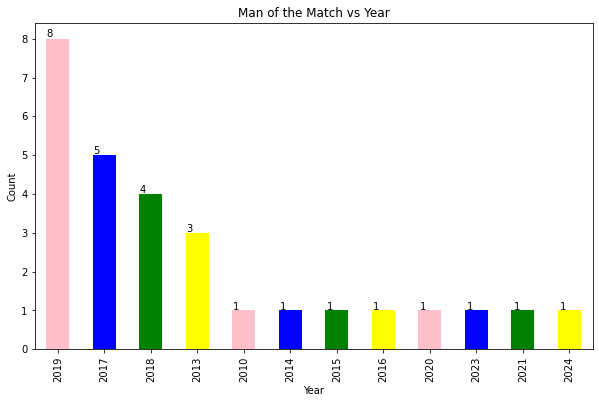

'Observation: Maximum no. of times he has received Man of the Match award in the year 2019'

In [284]:
plt.figure(figsize=(10,6))
ax=data[data['Man_of_the_Match_Encoded']==1]['Year'].value_counts().plot(kind='bar',color=['Pink','Blue','Green','Yellow'])
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))

plt.title('Man of the Match vs Year')
plt.ylabel('Count')
plt.xlabel('Year')
plt.show()
display('Observation: Maximum no. of times he has received Man of the Match award in the year 2019')

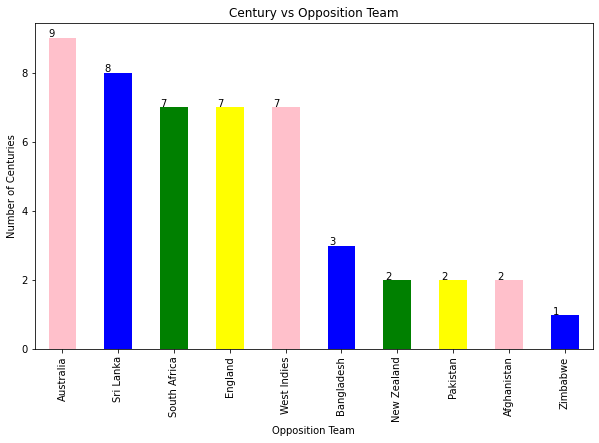

In [283]:
plt.figure(figsize=(10,6))

ax=data['Against'].value_counts().plot(kind='bar',color=['Pink','Blue','Green','Yellow'])
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))

plt.xlabel('Opposition Team')
plt.ylabel('Number of Centuries')
plt.title('Century vs Opposition Team')
plt.show()

In [292]:
runs_year=data.groupby('Year')['Score'].sum()

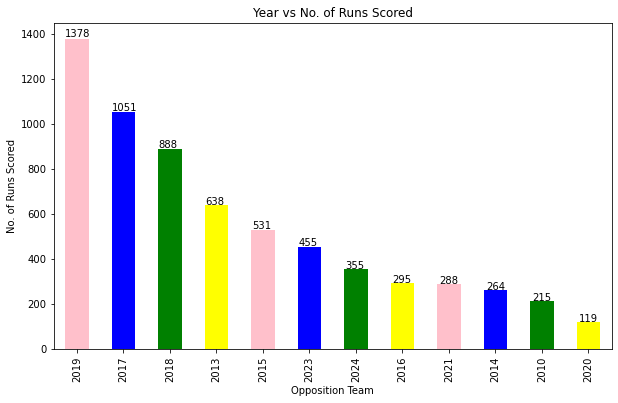

In [298]:
plt.figure(figsize=(10,6))
ax=runs_year.sort_values(ascending=False).plot(kind='bar',color=['Pink','Blue','Green','Yellow'])
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))

plt.xlabel('Opposition Team')
plt.ylabel('No. of Runs Scored')
plt.title('Year vs No. of Runs Scored')
plt.show()

# Against which team he has won maximum matches as Captain

<Figure size 720x432 with 0 Axes>

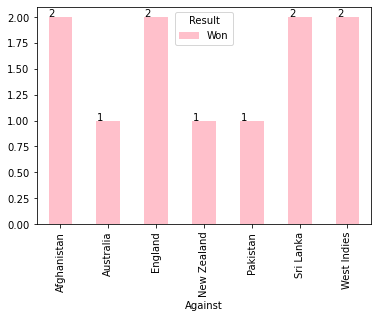

In [316]:
plt.figure(figsize=(10,6))

ax=pd.crosstab(data['Against'], captain_data['Result']).plot(kind='bar',color=['Pink'])
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))

plt.show()

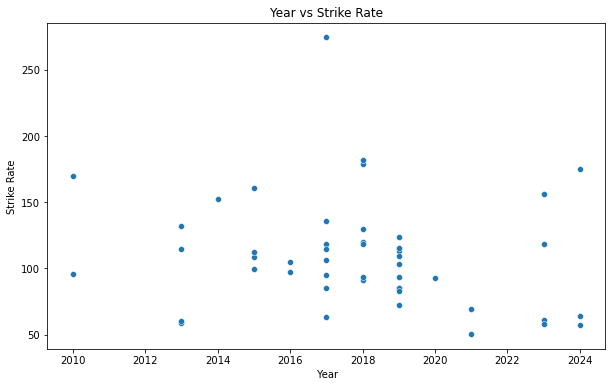

In [336]:
plt.figure(figsize=(10,6))
sns.scatterplot(data['Year'], data['Strike Rate'])
plt.xlabel(' Year')
plt.ylabel('Strike Rate')
plt.title('Year vs Strike Rate')
plt.show()

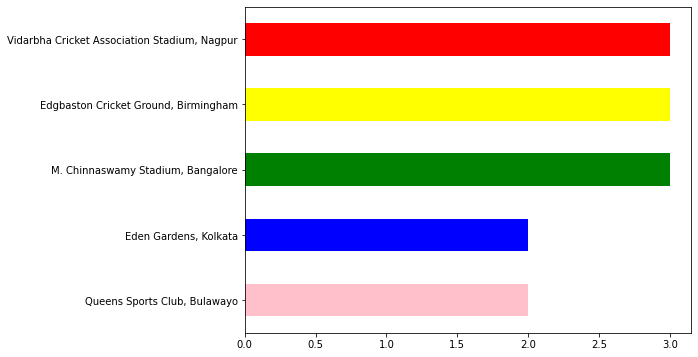

In [346]:
plt.figure(figsize=(8,6))
data['Venue'].value_counts()[:5].sort_values(ascending=True).plot(kind='barh',color=['Pink','Blue','Green','Yellow','Red'])
plt.show()

In [412]:
print(data.groupby('H/A/N')['Strike Rate'].mean())
display('Observation: On average, his strike rate is 113 at home, 99 away, and 112 in neutral conditions')

H/A/N

Away        99.736154

Home       113.628889

Neutral    112.367500

Name: Strike Rate, dtype: float64


'Observation: On average, his strike rate is 113 at home, 99 away, and 112 in neutral conditions'

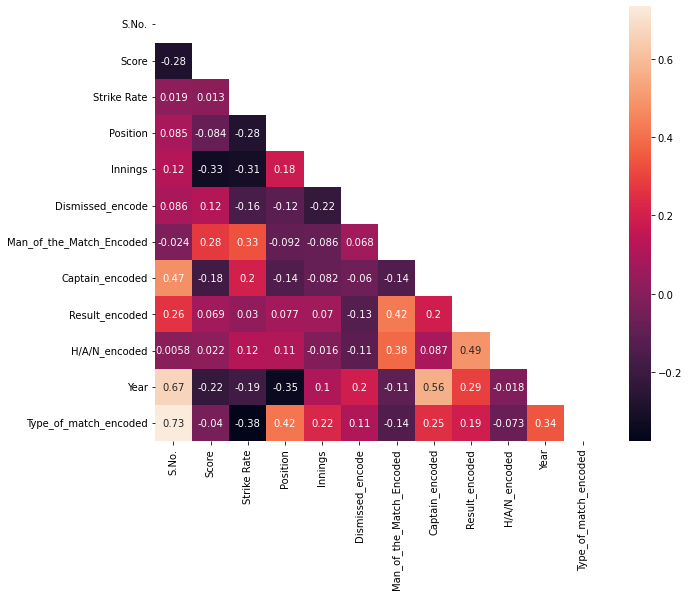

In [376]:
plt.figure(figsize=(10,8))
sns.heatmap(data.corr(), annot=True, mask=np.triu(np.ones_like(data.corr())))
plt.show()

# Outliers using Boxplot

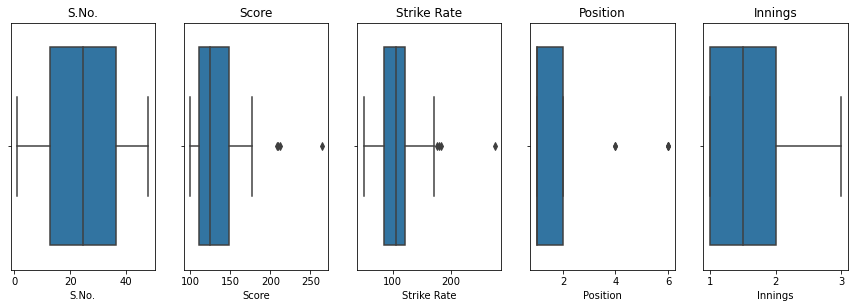

In [377]:
plt.figure(figsize=(15,10))
t=1
for i in num_cols:
    plt.subplot(2,5,t)
    sns.boxplot(data[i], orient='h')
    plt.title(i)
    t+=1

plt.show()

In [474]:
print('Note: In this dataset we have not treated the Outliers')

Note: In this dataset we have not treated the Outliers


# Model Building- Base Model

In [401]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier

In [388]:
num_cols=data.select_dtypes(include='number')
num_cols.columns

Index(['S.No.', 'Score', 'Strike Rate', 'Position', 'Innings',
       'Dismissed_encode', 'Man_of_the_Match_Encoded', 'Captain_encoded',
       'Result_encoded', 'H/A/N_encoded', 'Year', 'Type_of_match_encoded'],
      dtype='object')

In [389]:
x=num_cols.drop(columns=['Result_encoded', 'S.No.'])
y=data['Result_encoded']

In [390]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y, train_size=0.20, random_state=20)

# LogisticRegression Model

In [391]:
model=LogisticRegression()

In [392]:
model.fit(xtrain,ytrain)

LogisticRegression()

In [435]:
y_pred=model.predict(xtest)

accuracy=accuracy_score(ytest,y_pred)
print('Accuracy of the Logistic Regression model is', accuracy*100)

matrix=confusion_matrix(ytest,y_pred)
print(f'Confusion matrix is {matrix}')



Accuracy of the Logistic Regression model is 79.48717948717949

Confusion matrix is [[ 0  7  0]

 [ 0 31  0]

 [ 0  1  0]]


# Decision Tree Classifier Model

In [396]:
model1=DecisionTreeClassifier()

In [440]:
model1.fit(xtrain,ytrain)

y_pred=model1.predict(xtest)

decision_tree_accuracy=accuracy_score(ytest,y_pred)

print('Decision tree accuracy is ', decision_tree_accuracy*100)

Decision tree accuracy is  87.17948717948718


# RandomForestClassifier Model

In [442]:
model2=RandomForestClassifier()

model2.fit(xtrain,ytrain)

y_pred=model2.predict(xtest)

random_forest_classifier_accuracy=accuracy_score(ytest,y_pred)
print('Random Forest Classifier tree accuracy is ', (random_forest_classifier_accuracy*100))

Random Forest Classifier tree accuracy is  84.61538461538461


# XGBOOST Model

In [416]:
import xgboost as xgb

In [417]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y, train_size=0.20, random_state=20)

In [418]:
xgb_classifier = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb_classifier.fit(xtrain,ytrain)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=None, ...)

In [421]:
ypred=xgb_classifier.predict(xtest)

In [423]:
print('Accuracy score is', accuracy_score(ytest, ypred)*100)

Accuracy score is 79.48717948717949


In [444]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm

X = sm.add_constant(num_cols)
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns

print(vif)

      VIF Factor                  features

0   2.633769e+06                     const

1   9.966188e+00                     S.No.

2   1.686998e+00                     Score

3   3.751159e+00               Strike Rate

4   2.342201e+00                  Position

5   1.477275e+00                   Innings

6   1.371092e+00          Dismissed_encode

7   1.909226e+00  Man_of_the_Match_Encoded

8   2.324949e+00           Captain_encoded

9   2.052253e+00            Result_encoded

10  1.535539e+00             H/A/N_encoded

11  7.214814e+00                      Year

12  7.042683e+00     Type_of_match_encoded


In [445]:
data.columns

Index(['S.No.', 'Date', 'Score', 'Strike Rate', 'Type of Match', 'Position',
       'Innings', 'Dismissed ', 'Man of the Match', 'Captain', 'Against',
       'Venue', 'H/A/N', 'Result', 'Dismissed_encode',
       'Man_of_the_Match_Encoded', 'Captain_encoded', 'Result_encoded',
       'H/A/N_encoded', 'Year', 'Type_of_match_encoded'],
      dtype='object')

In [446]:
features_to_keep=[  'Score', 'Strike Rate', 'Position',
       'Innings','Dismissed_encode','Man_of_the_Match_Encoded', 'Captain_encoded', 'Result_encoded','H/A/N_encoded']

In [449]:
x_selected=data[features_to_keep]

In [453]:
from statsmodels.tools.tools import add_constant
x_selected=add_constant(x_selected)

In [456]:
vif_data = pd.DataFrame()
vif_data["Feature"] = x_selected.columns
vif_data["VIF"] = [variance_inflation_factor(x_selected.values, i) for i in range(x_selected.shape[1])]


In [457]:
print(vif_data)

                    Feature        VIF

0                     const  79.107118

1                     Score   1.298298

2               Strike Rate   1.626200

3                  Position   1.166781

4                   Innings   1.409080

5          Dismissed_encode   1.225224

6  Man_of_the_Match_Encoded   1.877222

7           Captain_encoded   1.299096

8            Result_encoded   1.673923

9             H/A/N_encoded   1.434686


## Final Model-After removing the columns which have high multicolnarity

# Logistic Regression

In [459]:
x=x_selected.drop(columns=['Result_encoded'])
y=x_selected['Result_encoded']

In [460]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y, train_size=0.20, random_state=20)

In [462]:
model4=LogisticRegression()

In [463]:
model4.fit(xtrain,ytrain)

LogisticRegression()

In [464]:
y_pred=model4.predict(xtest)

accuracy=accuracy_score(ytest,y_pred)
print('Accuracy of the Logistic Regression model is', accuracy*100)

matrix=confusion_matrix(ytest,y_pred)
print(f'Confusion matrix is {matrix}')



Accuracy of the Logistic Regression model is 76.92307692307693

Confusion matrix is [[ 0  7  0]

 [ 1 30  0]

 [ 0  1  0]]


# DecisionTreeClassifier

In [465]:
model5=DecisionTreeClassifier()

In [468]:
model5.fit(xtrain,ytrain)

y_pred=model5.predict(xtest)

decision_tree_accuracy=accuracy_score(ytest,y_pred)

print('Decision tree accuracy is ', decision_tree_accuracy*100)

Decision tree accuracy is  82.05128205128204


# RandomForestClassifier

In [467]:
model6=RandomForestClassifier()

model6.fit(xtrain,ytrain)

y_pred=model6.predict(xtest)

random_forest_classifier_accuracy=accuracy_score(ytest,y_pred)
print('Random Forest Classifier tree accuracy is ', (random_forest_classifier_accuracy*100))

Random Forest Classifier tree accuracy is  82.05128205128204


# XGB Classifier Model

In [470]:
xgb_classifier_1 = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb_classifier_1.fit(xtrain,ytrain)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=None, ...)

In [471]:
ypred=xgb_classifier_1.predict(xtest)
print('Accuracy score is', accuracy_score(ytest, ypred)*100)

Accuracy score is 79.48717948717949


In [473]:
print('Observation: The final model which I have selected for the analysis purpose is Logistic Regression')

Observation: The final model which I have selected for the analysis purpose is Logistic Regression
